# Explore here

In [1]:
# Your code here
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Planteamiento del problema y recolección de la data

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

In [2]:
# Lectura y guardado data
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_diabetes=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [4]:
# Guardado de la data
df_diabetes = pd.read_csv(url)
df_diabetes_inicial = pd.read_csv(url)


# Ruta de destino
ruta_destino = '/workspaces/Proyecto-Arbol-de-Decision/data/raw/diabetes.csv'
ruta_destino_i = '/workspaces/Proyecto-Arbol-de-Decision/data/raw/diabetes_inicial.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
df_diabetes.to_csv(ruta_destino, index=False)
df_diabetes_inicial.to_csv(ruta_destino_i, index=False)

print(f'Archivo guardado en: {ruta_destino}')

Archivo guardado en: /workspaces/Proyecto-Arbol-de-Decision/data/raw/diabetes.csv


In [5]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Exploración y limpieza de los Datos

In [9]:
# Valores Nulos
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Valores duplicados
df_diabetes.duplicated().sum()

np.int64(0)

Los datos estan conformados por 768 valores, 7 variables incluyendo la clase a predecir (Outcome)

las predictoras estan conformadas por: Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction y Age.

* No existen valores nulos ni duplicados. 

La distribucion de los tipos de variables es la siguiente:

* Pregnancies int64
* Glucose int64
* Insulin int64
* BMI float64
* DiabetesPedigreeFunction float64
* Age int64
* Outcome int64

# Análisis de variables univariante

Variables Numéricas

In [12]:
df_diabetes.Outcome.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [14]:
df_diabetes.loc[df_diabetes.Outcome==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


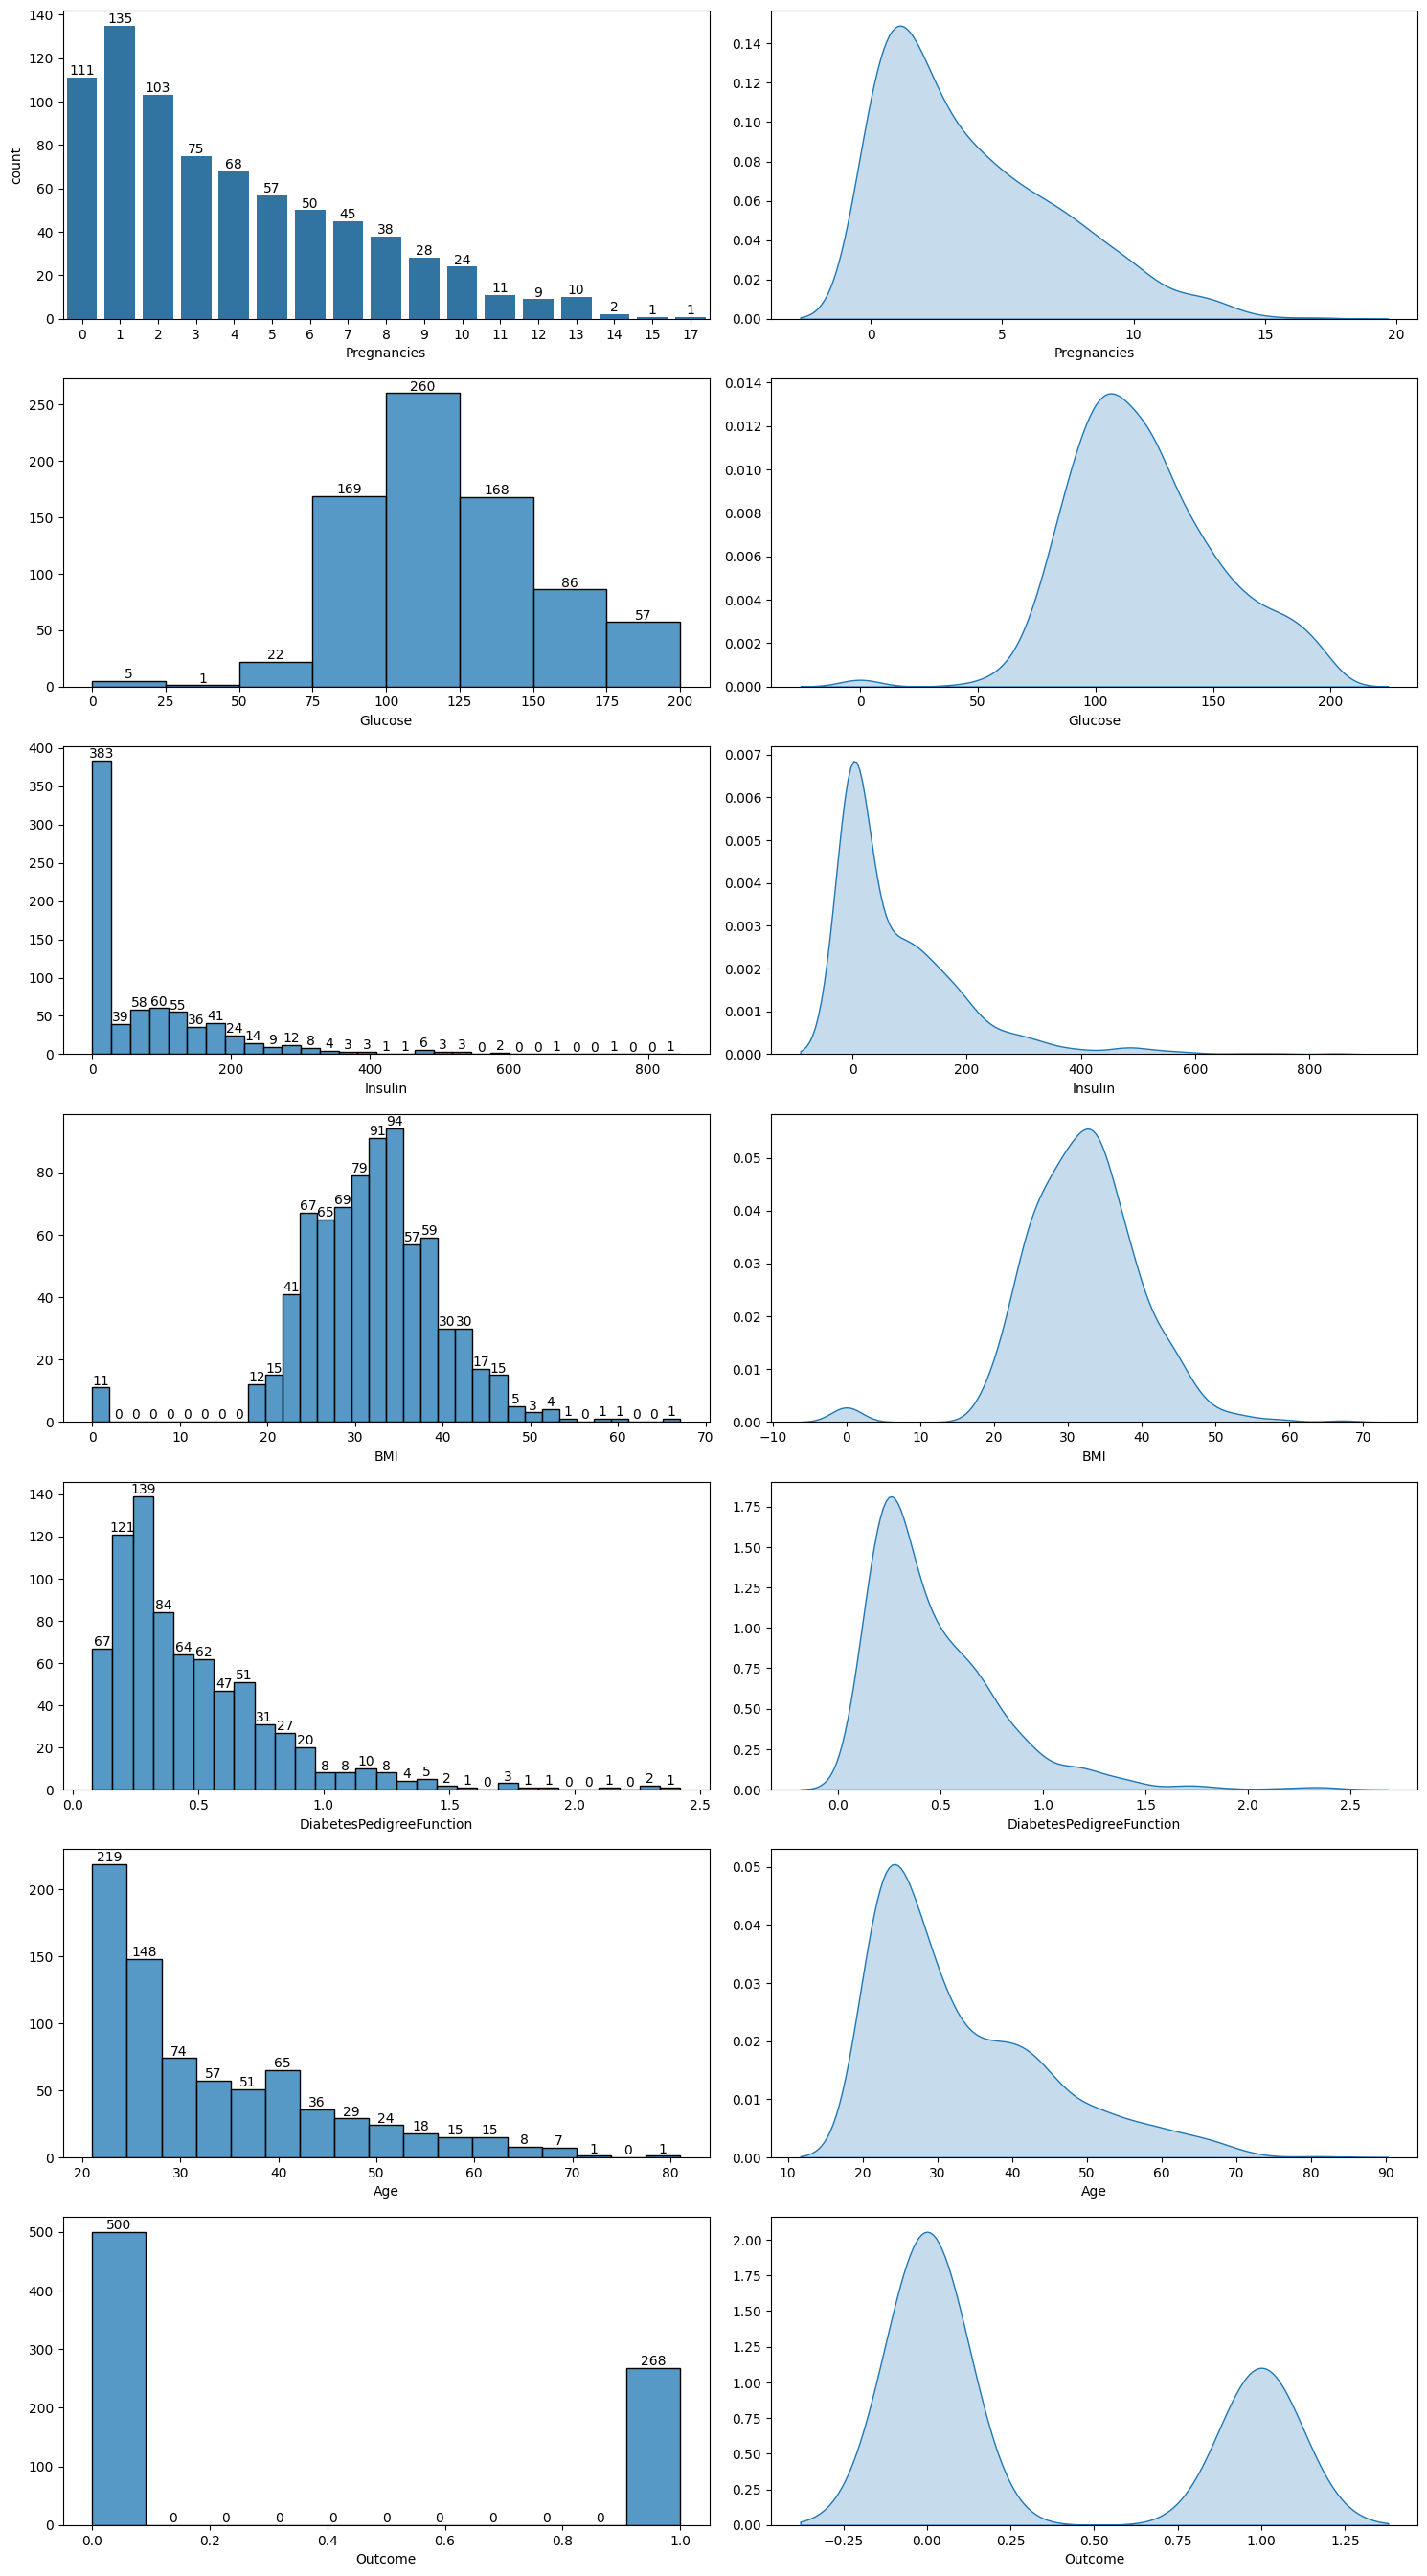

In [15]:
# Graficamos
fig, axis = plt.subplots(7,2, figsize = (15, 27))

# Crear un histograma múltiple
sns.countplot(ax = axis[0,0], data = df_diabetes, x = "Pregnancies")
axis[0,0].bar_label(axis[0,0].containers[0])
sns.kdeplot(ax = axis[0,1], data = df_diabetes["Pregnancies"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[1,0],data = df_diabetes, x = "Glucose", bins=(0,25,50,75,100,125,150,175,200)).set(ylabel = None)
axis[1,0].bar_label(axis[1,0].containers[0])
sns.kdeplot(ax = axis[1,1], data = df_diabetes["Glucose"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[2,0], data = df_diabetes, x = "Insulin").set(ylabel = None) 
axis[2,0].bar_label(axis[2,0].containers[0])
sns.kdeplot(ax = axis[2,1], data = df_diabetes["Insulin"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[3,0],data = df_diabetes, x = "BMI").set(ylabel = None) 
axis[3,0].bar_label(axis[3,0].containers[0])
sns.kdeplot(ax = axis[3,1], data = df_diabetes["BMI"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[4,0], data = df_diabetes, x = "DiabetesPedigreeFunction").set(ylabel = None)
axis[4,0].bar_label(axis[4,0].containers[0])
sns.kdeplot(ax = axis[4,1], data = df_diabetes["DiabetesPedigreeFunction"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[5,0], data = df_diabetes, x='Age').set(ylabel = None)
axis[5,0].bar_label(axis[5,0].containers[0])
sns.kdeplot(ax = axis[5,1], data = df_diabetes["Age"],fill=True).set(ylabel = None)

sns.histplot(ax = axis[6,0], data = df_diabetes, x='Outcome').set(ylabel = None)
axis[6,0].bar_label(axis[6,0].containers[0])
sns.kdeplot(ax = axis[6,1], data = df_diabetes['Outcome'],fill=True).set(ylabel = None)

plt.tight_layout()
plt.show()

El análisis de los histogramas muestra la siguiente información:

* Pregnancies. 75% Valores son <= a 6, mediana = 3, media = 3.8, valor max 17. Sesgo positvo.
* Glucose. 75% Valores son <= a 140.25, mediana = 117.0, media = 120.9, valor max 199.
* Insulin. 75% Valores son <= a 127.25, mediana = 30.5, media = 79.8, valor max 846. Sesgo +.
* BMI. 75% Valores son <= a 36.6, mediana = 32.0, media = 32.0 %, moda=32. valor max 67.1. Distribucion Normal. Mediana=Media=Moda.
* DiabetesPedigreeFunction. 75% Valores son <= a 0.63, mediana = 0.37, media = 0.47, valor max 2.42. Sesgo +.
* Age. 75% Valores son <= a 41, mediana = 29, media = 33, valor max 81. Sesgo +.
* Outcome. 35% de los Valores son = a 1 y el 65% son iguales a 0. La variable clase esta desbalanceada

# Análisis Variables Multivariante

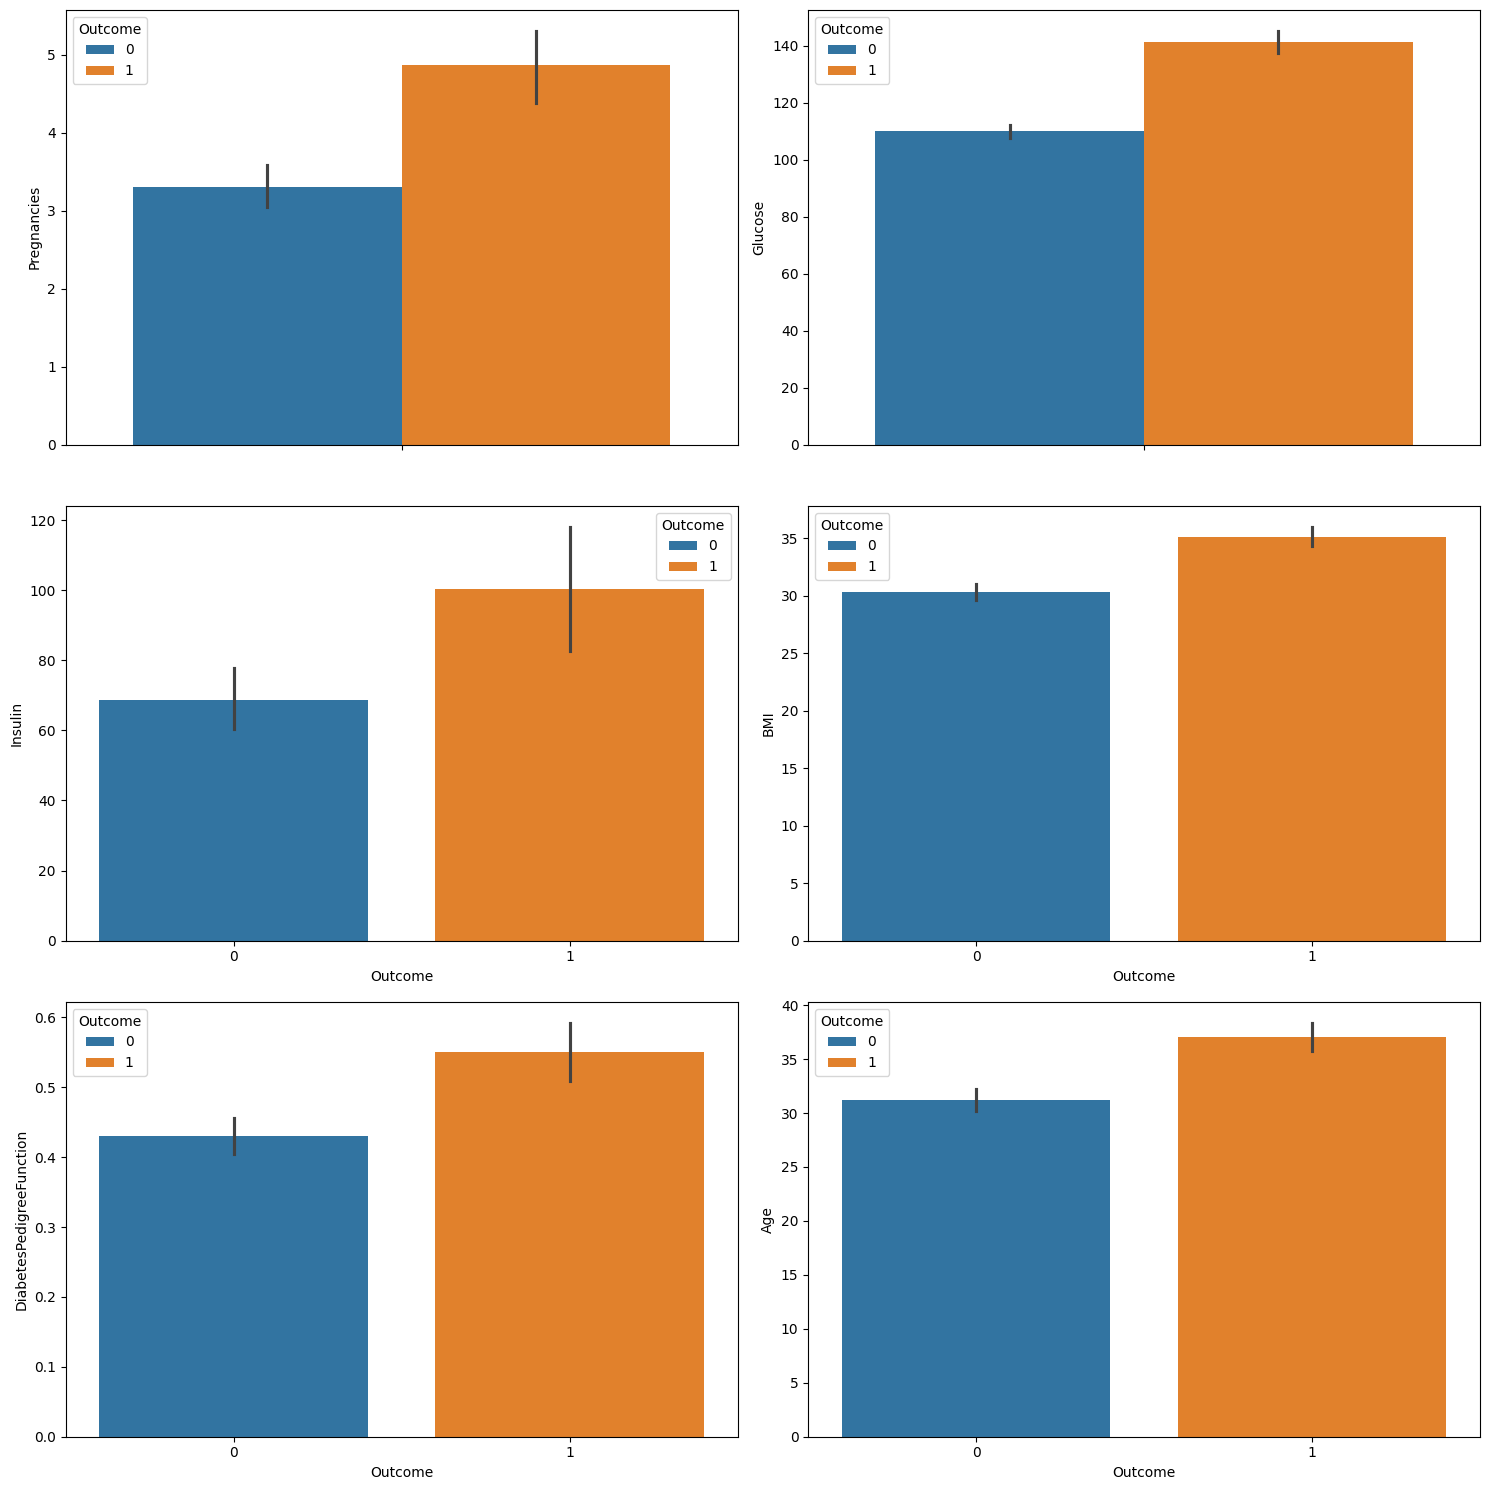

In [16]:
# Graficamos las variables predictoras vs la objetivo
fig, axis = plt.subplots(3,2, figsize = (15, 15))

sns.barplot(ax = axis[0, 0], data = df_diabetes, y="Pregnancies", hue='Outcome')
sns.barplot(ax = axis[0, 1], data = df_diabetes, y ="Glucose", hue='Outcome')
sns.barplot(ax = axis[1, 0],data=df_diabetes,x ='Outcome', y="Insulin", hue='Outcome')
sns.barplot(ax = axis[1,1],data=df_diabetes,x ='Outcome', y="BMI", hue='Outcome')
sns.barplot(ax = axis[2, 0],data=df_diabetes,x ='Outcome', y="DiabetesPedigreeFunction", hue='Outcome')
sns.barplot(ax = axis[2,1],data=df_diabetes,x ='Outcome', y="Age", hue='Outcome')

plt.tight_layout()
plt.show()

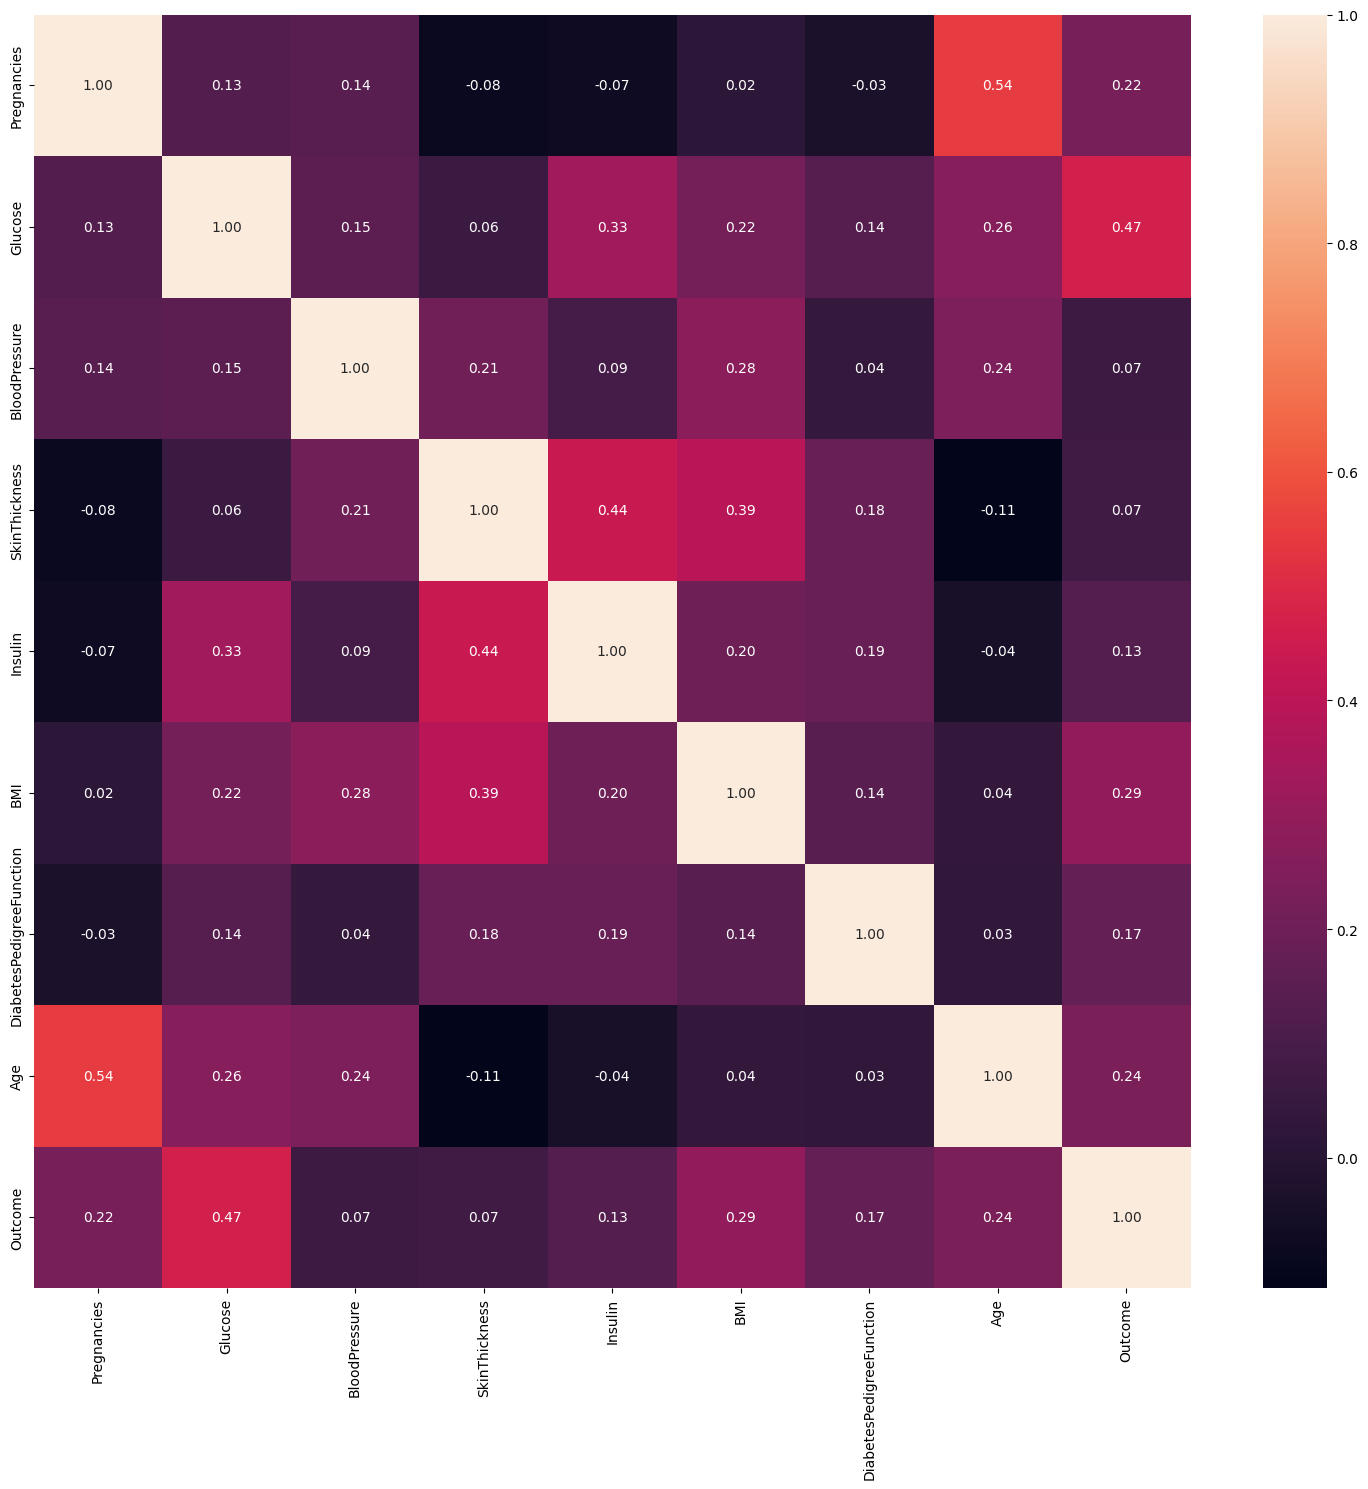

In [17]:
# Matriz de Correlación
fig, axis = plt.subplots(figsize = (15,15))
matriz_corr=df_diabetes.corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

* En orden descendente, el factor de correlación de las características con el target quedó determinado de la siguiente manera:

- Glucosa 0.47
- BMI 0.29
- Age 0.24
- Pregnancies 0.22
- DiabetesPedigreeFunction 0.17
- Insulin 0.13

* La relación observada es positiva, es decir, la presencia de la diabetis (valor 1), se observa con incrementos de cada una de las características. Los valores promedios de las caracteristicas son más altos en la clase 1 que 0.
